# Data Preprocessing air quality 

In [66]:
# import packages
import pandas as pd
import numpy as np
import warnings

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import boxcox
warnings.filterwarnings('ignore')


In [34]:
# import data
data = pd.read_csv('data/data_51.csv', index_col=[0])
data.head(2)

,ID,location,temp,precip,rel_humidity,wind_dir,wind_spd,atmos_press,target,max_temp,...,var_wind_spd,median_wind_spd,ptp_wind_spd,max_atmos_press,min_atmos_press,mean_atmos_press,std_atmos_press,var_atmos_press,median_atmos_press,ptp_atmos_press
0,ID_train_0,C,"[26.90909091, 27.20833333, 26.18333333, 24.7, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.5108181820000001, 0.535416667, 0.6145, 0.63...","[272.90275160000004, 104.565241, 167.1772247, ...","[0.800909091, 1.073333333, 1.5175, 1.4625, 0.5...","[87.77727273, 87.6525, 87.61416667, 87.6375, 8...",45.126304,27.208333,...,0.155268,0.666250,1.355000,87.871667,87.614167,87.752434,0.070374,0.004952,87.762083,0.257500
1,ID_train_1,D,"[22.53333333, 21.71666667, 20.83333333, 20.983...","[0.102, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.034, 0...","[0.744583333, 0.808083333, 0.911166667, 0.9163...","[281.6643101, 89.15629262, 81.96853891, 291.01...","[2.3775, 1.126666667, 0.700833333, 0.341666667...","[90.32, 90.3775, 90.44083333, 90.4725, 90.4541...",79.131702,33.616667,...,0.290736,0.744167,2.760833,90.725000,90.056667,90.429924,0.156000,0.024336,90.429167,0.668333


In [35]:
# name of columns
features=["temp","precip","rel_humidity","wind_dir","wind_spd","atmos_press"]
max_features = ["max_" + str(feat) for feat in features]
min_features = ["min_" + str(feat) for feat in features]
mean_features = ["mean_" + str(feat) for feat in features]
std_features = ["std_" + str(feat) for feat in features]
var_features = ["vat_" + str(feat) for feat in features]
median_features = ["median_" + str(feat) for feat in features]
ptp_features = ["ptp_" + str(feat) for feat in features]


<AxesSubplot:xlabel='target', ylabel='Count'>

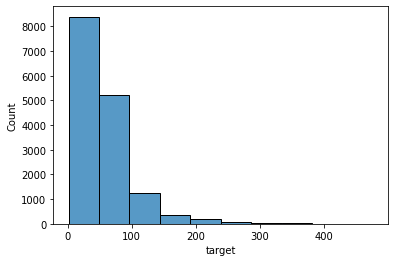

In [36]:
# overview of the target 
sns.histplot(data.target, bins=10)  # TODO bins passend zu der Klassifizierung



In [37]:
#data['target'], lmbda=boxcox(data['target'], lmbda=None)
data['target_log'] = data['target'].apply(np.log1p)

<AxesSubplot:xlabel='target_log', ylabel='Count'>

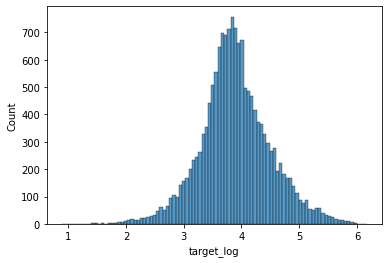

In [38]:
sns.histplot(data.target_log)


In [39]:
# null values
def print_null(df):
    total = df.isnull().sum().sort_values(ascending=False)
    total = total[df.isnull().sum().sort_values(ascending=False) != 0]
    percent = total /df.shape[0]*100
    percent = percent[df.isnull().sum().sort_values(ascending=False) != 0]
    concat = pd.concat([total, percent])
    print (concat)

    
print_null(data.drop(features, axis=1))

target_log    5035.000000
target        5035.000000
target_log      24.472635
target          24.472635
dtype: float64


In [30]:
#sns.pairplot(data[mean_features])

#### EDA on precipitation

In [40]:
# EDA precipitation:
precip_stats = pd.concat([data.max_precip, 
                        data.min_precip, 
                        data.mean_precip, 
                        data.std_precip, 
                        data.var_precip, 
                        data.median_precip,  # all 0,0
                        data.ptp_precip],
                        axis=1)
precip_stats['r_std_precip'] = precip_stats['std_precip'] / precip_stats['mean_precip'] *100
data['sum_precip'] = data['precip'].apply(lambda x: np.sum(x))

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U80'), dtype('<U80')) -> None

<AxesSubplot:xlabel='mean_precip', ylabel='target'>

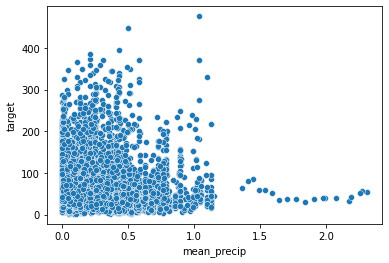

In [ ]:
sns.scatterplot(data=data, x='mean_precip', y='target')

In [ ]:
sns.scatterplot(data=data, x='sum_precip', y='target')

ValueError: Could not interpret value `sum_precip` for parameter `x`

In [ ]:
data.median_precip.unique()

array([0.])

In [ ]:
data[['precip', 'std_precip','mean_precip']].head(2)



,precip,std_precip,mean_precip
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000,0.000000
1,"[0.102, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.034, 0...",0.051706,0.007025


In [ ]:
precip_stats.median_precip.unique() #median values are all 0, why?

array([0.])

<AxesSubplot:xlabel='mean_precip', ylabel='Count'>

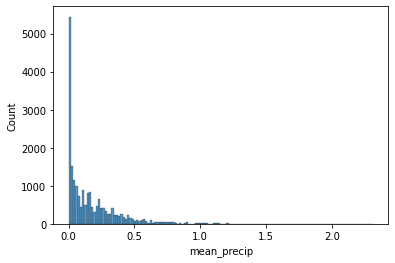

In [ ]:
sns.histplot(precip_stats.mean_precip) # a lot of mean values == 0, when it doesnt rain

In [ ]:
"""def log1p(x):
    return np.log1p(x)

precip_stats['log_mean_precip'] = precip_stats['mean_precip'].apply(lambda x: log1p(X) for X in precip_stats.mean_precip )"""

"def log1p(x):\n    return np.log1p(x)\n\nprecip_stats['log_mean_precip'] = precip_stats['mean_precip'].apply(lambda x: log1p(X) for X in precip_stats.mean_precip )"

KeyboardInterrupt: 

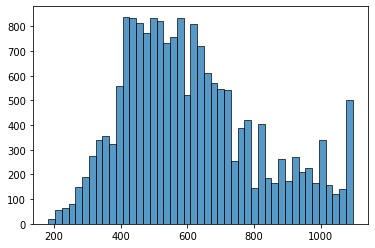

In [ ]:
# relative Standard deviation of the precipitation
sns.histplot(precip_stats.r_std_precip)

In [ ]:
precip_stats.r_std_precip.sort_values(ascending=False)[:3]

8729    1095.445115
4436    1095.445115
534     1095.445115
Name: r_std_precip, dtype: float64

In [ ]:
precip_stats.values[3]

array([ 25.787     ,   0.        ,   1.12727273,   3.73988635,
        13.98674993,   0.        ,  25.787     , 331.76411197])

In [ ]:

#np.std(data.precip[90])/
np.mean(data.precip[3])#*100

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U719'), dtype('<U719')) -> None

In [ ]:
np.std(data.precip[3])

3.7398863530706783

The relative standard deviation is less than 15%, it should be ok

#### EDA on humidity 

In [ ]:
# EDA humidity:
rel_hum_stats = pd.concat([data.max_rel_humidity, 
                        data.min_rel_humidity, 
                        data.mean_rel_humidity, 
                        data.std_rel_humidity, 
                        data.var_rel_humidity, 
                        data.median_rel_humidity,  # all 0
                        data.ptp_rel_humidity],
                        axis=1)
rel_hum_stats['r_std_rel_humidity'] = rel_hum_stats['std_rel_humidity'] / rel_hum_stats['mean_rel_humidity'] * 100


<AxesSubplot:xlabel='mean_rel_humidity', ylabel='Count'>

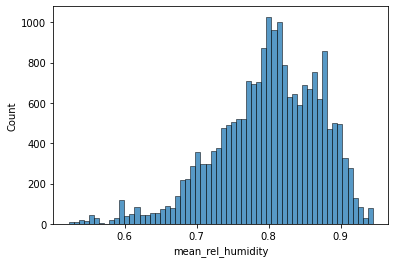

In [ ]:
sns.histplot(rel_hum_stats.mean_rel_humidity) # a lot of mean values == 0, when it doesnt rain

<AxesSubplot:xlabel='r_std_rel_humidity', ylabel='Count'>

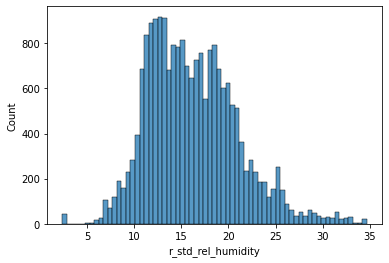

In [ ]:
# relative Standard deviation of the precipitation
sns.histplot(rel_hum_stats.r_std_rel_humidity)

### EDA on wind speed

In [ ]:
# EDA wind speed on metres per second:
wind_spd_stats = pd.concat([data.max_wind_spd, 
                        data.min_wind_spd, 
                        data.mean_wind_spd, 
                        data.std_wind_spd, 
                        data.var_wind_spd, 
                        data.median_wind_spd,  # all 0
                        data.ptp_wind_spd],
                        axis=1)
wind_spd_stats['r_std_wind_spd'] = wind_spd_stats['std_wind_spd'] / wind_spd_stats['mean_wind_spd'] * 100

<AxesSubplot:xlabel='mean_wind_spd', ylabel='Count'>

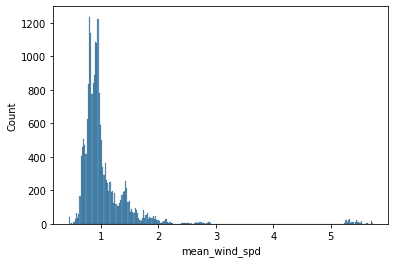

In [ ]:
sns.histplot(wind_spd_stats.mean_wind_spd) # 5m/2 means Beafourt 3 -> leichte brise

<AxesSubplot:xlabel='r_std_wind_spd', ylabel='Count'>

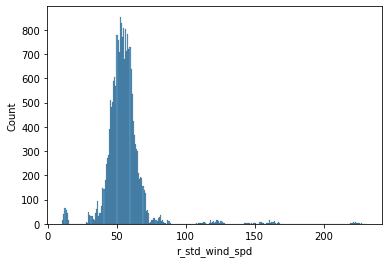

In [ ]:
sns.histplot(wind_spd_stats.r_std_wind_spd)

#### atmos_press: mean atmospheric pressure(atm)*

[(87.5, 91.0)]

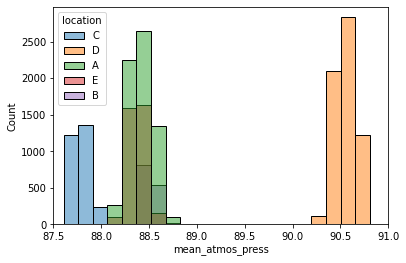

In [ ]:
p = sns.histplot(data=data , x = 'mean_atmos_press', hue='location')
p.set(xlim=(87.5, 91))


[(87.5, 91.0)]

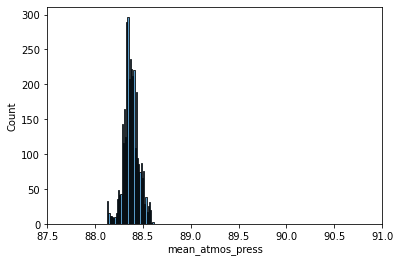

In [ ]:
locations = ['A', 'B', 'C', 'D', 'E']

a = data[(data['location']=='E')]
ad= sns.histplot(a.mean_atmos_press)
ad.set(xlim=(87.5, 91))

mean_atmos_press depends on the location. 
?needs to level?

# Feature engineering

on data process

In [53]:
train_z = pd.read_csv('data/train_process.csv')
test_z = pd.read_csv('data/test_process.csv')

### Log(1+x) Tranform target

In [54]:
train_z['log_target'] = train_z['target'].apply(np.log1p)

### One Hot encoder location

In [41]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
enc.fit(data["location"])
data["location"]=enc.transform(data["location"])


In [51]:
enc.fit(data["location"])
data["location"]=enc.transform(data["location"])

In [52]:
data

,ID,location,temp,precip,rel_humidity,wind_dir,wind_spd,atmos_press,target,max_temp,...,median_wind_spd,ptp_wind_spd,max_atmos_press,min_atmos_press,mean_atmos_press,std_atmos_press,var_atmos_press,median_atmos_press,ptp_atmos_press,target_log
0,ID_train_0,2,"[26.90909091, 27.20833333, 26.18333333, 24.7, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.5108181820000001, 0.535416667, 0.6145, 0.63...","[272.90275160000004, 104.565241, 167.1772247, ...","[0.800909091, 1.073333333, 1.5175, 1.4625, 0.5...","[87.77727273, 87.6525, 87.61416667, 87.6375, 8...",45.126304,27.208333,...,0.666250,1.355000,87.871667,87.614167,87.752434,0.070374,0.004952,87.762083,0.257500,3.831383
1,ID_train_1,3,"[22.53333333, 21.71666667, 20.83333333, 20.983...","[0.102, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.034, 0...","[0.744583333, 0.808083333, 0.911166667, 0.9163...","[281.6643101, 89.15629262, 81.96853891, 291.01...","[2.3775, 1.126666667, 0.700833333, 0.341666667...","[90.32, 90.3775, 90.44083333, 90.4725, 90.4541...",79.131702,33.616667,...,0.744167,2.760833,90.725000,90.056667,90.429924,0.156000,0.024336,90.429167,0.668333,4.383672
2,ID_train_10,0,"[28.975, 27.95, 29.6, 26.425, 22.09166667, 21....","[0.0, 0.0, 0.0, 0.102, 0.136, 0.0, 0.0, 2.16, ...","[0.573333333, 0.597166667, 0.5668333329999999,...","[328.68291380000005, 307.8251459, 319.0177512,...","[1.0325, 1.193333333, 1.275833333, 1.493333333...","[88.55166667, 88.46416667, 88.31916667, 88.24,...",32.661304,31.841667,...,0.942500,2.420000,88.813333,87.982500,88.420931,0.179481,0.032213,88.425000,0.830833,3.516349
3,ID_train_100,0,"[22.96666667, 24.26666667, 25.275, 25.625, 25....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.77,...","[0.8430833329999999, 0.79025, 0.7375, 0.728, 0...","[300.0850574, 293.6769595, 294.5174647, 301.92...","[1.446666667, 1.1925, 1.324166667, 1.544166666...","[88.615, 88.53083333, 88.4, 88.27166667, 88.20...",53.850238,27.491667,...,1.388333,2.469167,88.685000,87.965000,88.376915,0.161758,0.026166,88.400000,0.720000,4.004607
4,ID_train_1000,0,"[21.875, 21.575, 21.525, 21.43333333, 20.50833...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.8564166670000001, 0.874916667, 0.879833333,...","[21.83997432, 17.05405341, 89.26406044, 123.58...","[0.1975, 0.244166667, 0.411666667, 0.56, 0.577...","[88.55666667, 88.64083333, 88.65833333, 88.647...",177.418750,28.750000,...,0.542917,1.796667,88.719167,88.268333,88.538104,0.118369,0.014011,88.552500,0.450833,5.184133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20569,ID_test_995,2,"[25.925, 25.80833333, 24.58333333, 24.0, 24.05...","[0.0, 0.0, 0.0, 0.408, 0.017, 0.0, 0.0, 0.0, 0...","[0.645416667, 0.637416667, 0.705333333, 0.6988...","[329.8319536, 343.2603743, 167.5577726, 161.14...","[0.749166667, 0.7425, 1.3766666669999998, 1.49...","[87.8075, 87.73833333, 87.66166667, 87.5566666...",NaN,26.325000,...,0.675000,1.576667,88.085833,87.389167,87.699704,0.153148,0.023454,87.695000,0.696667,NaN
20570,ID_test_996,3,"[22.16666667, 21.68333333, 20.15833333, 19.825...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.82275, 0.827666667, 0.876416667, 0.88891666...","[291.1252201000001, 277.1125974, 248.1977595, ...","[0.980833333, 0.78, 0.45, 0.46, 0.425833333, 0...","[90.75166667, 90.68916667, 90.61916667, 90.57,...",NaN,32.550000,...,0.879167,3.022500,90.949167,90.199167,90.640585,0.166249,0.027639,90.660833,0.750000,NaN
20571,ID_test_997,4,"[17.35833333, 18.4, 22.125, 25.40833333, 25.96...","[0.034, 0.017, 0.017, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.875833333, 0.898333333, 0.8666666670000001,...","[18.92517827, 2.478476814, 337.74147410000006,...","[1.4391666669999998, 1.466666667, 1.63, 1.9325...","[88.47666667, 88.535, 88.61416667, 88.6625, 88...",NaN,30.925000,...,1.750000,3.704167,88.662500,88.067500,88.375510,0.133175,0.017736,88.390833,0.595000,NaN
20572,ID_test_998,0,"[24.16666667, 24.59166667, 18.01818182, 21.708...","[0.0, 0.0, 7.519, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

In [67]:
data.to_csv("./data/data_encod.csv")

### original feature drop

in Zindi database is done

### export as csv


In [55]:
train_z.to_csv('data/train_ours.csv')
test_z.to_csv('data/test_ours.csv')

ImportError: cannot import name 'FilePath' from 'pandas._typing' (/Users/kaergell/Desktop/Neue Fische/Bootcamp/Tag-28-MLproject/airquality/.venv/lib/python3.9/site-packages/pandas/_typing.py)

## Basis Model

the prediction gives the mean value of the target

In [56]:
from sklearn.metrics import mean_squared_error

In [57]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [58]:
def error_analysis(y_test, y_pred_test):
    """Generated true vs. predicted values and residual scatter plot for models

    Args:
        y_test (array): true values for y_test
        y_pred_test (array): predicted values of model for y_test
    """     
    # Calculate residuals
    residuals = y_test - y_pred_test
    
    # Plot real vs. predicted values 
    fig, ax = plt.subplots(1,2, figsize=(15, 5))
    plt.subplots_adjust(right=1)
    plt.suptitle('Error Analysis')
    
    ax[0].scatter(y_pred_test, y_test, color="#FF5A36", alpha=0.7)
    ax[0].plot([-400, 350], [-400, 350], color="#193251")
    ax[0].set_title("True vs. predicted values", fontsize=16)
    ax[0].set_xlabel("predicted values")
    ax[0].set_ylabel("true values")
    #ax[0].set_xlim((y_pred_test.min()-10), (y_pred_test.max()+10))
    ax[0].set_ylim((y_test.min()-40), (y_test.max()+40))
    
    ax[1].scatter(y_pred_test, residuals, color="#FF5A36", alpha=0.7)
    ax[1].plot([-400, 350], [0,0], color="#193251")
    ax[1].set_title("Residual Scatter Plot", fontsize=16)
    ax[1].set_xlabel("predicted values")
    ax[1].set_ylabel("residuals")
    #ax[1].set_xlim((y_pred_test.min()-10), (y_pred_test.max()+10))
    #ax[1].set_ylim((residuals.min()-10), (residuals.max()+10));

In [59]:
# with zindi data:

# mean target
mean_target_zindi = train_z.target.mean() # 58.24
# prediction are all the mean of the target 58.24
y_target_zindi = [mean_target_zindi for x in range (train_z.target.shape[0])]

# with our data : 

# transform all target values to log: 
y_target_log = [np.log1p(x) for x in y_target_zindi]
# mean value for log_target values
mean_target_log = np.mean(y_target_log) # 4.081
# prediction are all the mean of the log_target 
y_target_log = [mean_target_log for x in range (train_z.target.shape[0])]


rmse_zindi = rmse(train_z.target, y_target_zindi)
rmse_our =   rmse(train_z.log_target, y_target_log)



print('Zindi: ')
print (f'Mean Target : {mean_target_zindi:.2f} \t RMSE: {rmse_zindi:.2f} \t NRMSE: {rmse_zindi/mean_target_zindi:.2f}')
print('Our (log_transform)')
print (f'Mean Target: {mean_target_log:.2f} \t RMSE: {rmse_our:.2f} \t NRMSE:{rmse_our/mean_target_log:.2f}') #54.354144


Zindi: 
Mean Target : 58.24 	 RMSE: 42.37 	 NRMSE: 0.73
Our (log_transform)
Mean Target: 4.08 	 RMSE: 0.64 	 NRMSE:0.16


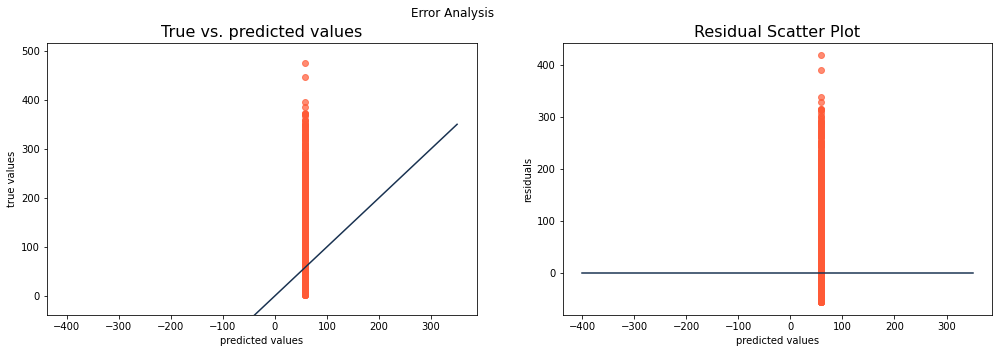

In [60]:
# error analysis 
error_analysis(train_z.target, y_target_zindi)           

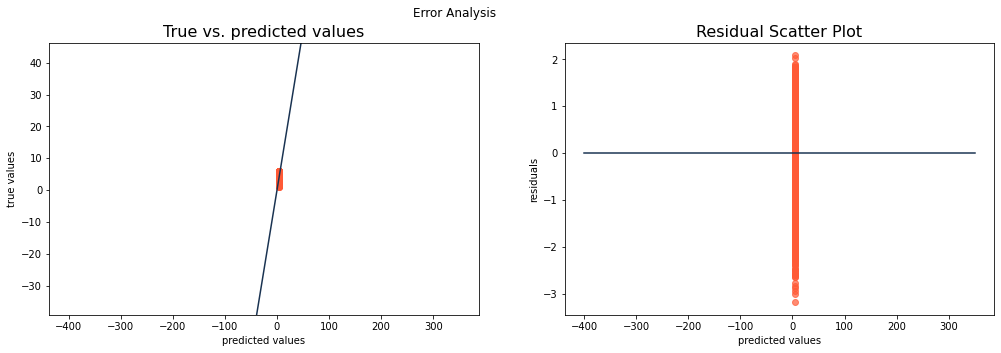

In [61]:
# error analysis in our data
error_analysis(train_z.log_target, y_target_log)

In [68]:
data.

,ID,location,temp,precip,rel_humidity,wind_dir,wind_spd,atmos_press,target,max_temp,...,median_wind_spd,ptp_wind_spd,max_atmos_press,min_atmos_press,mean_atmos_press,std_atmos_press,var_atmos_press,median_atmos_press,ptp_atmos_press,target_log
0,ID_train_0,2,"[26.90909091, 27.20833333, 26.18333333, 24.7, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.5108181820000001, 0.535416667, 0.6145, 0.63...","[272.90275160000004, 104.565241, 167.1772247, ...","[0.800909091, 1.073333333, 1.5175, 1.4625, 0.5...","[87.77727273, 87.6525, 87.61416667, 87.6375, 8...",45.126304,27.208333,...,0.666250,1.355000,87.871667,87.614167,87.752434,0.070374,0.004952,87.762083,0.257500,3.831383
1,ID_train_1,3,"[22.53333333, 21.71666667, 20.83333333, 20.983...","[0.102, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.034, 0...","[0.744583333, 0.808083333, 0.911166667, 0.9163...","[281.6643101, 89.15629262, 81.96853891, 291.01...","[2.3775, 1.126666667, 0.700833333, 0.341666667...","[90.32, 90.3775, 90.44083333, 90.4725, 90.4541...",79.131702,33.616667,...,0.744167,2.760833,90.725000,90.056667,90.429924,0.156000,0.024336,90.429167,0.668333,4.383672
2,ID_train_10,0,"[28.975, 27.95, 29.6, 26.425, 22.09166667, 21....","[0.0, 0.0, 0.0, 0.102, 0.136, 0.0, 0.0, 2.16, ...","[0.573333333, 0.597166667, 0.5668333329999999,...","[328.68291380000005, 307.8251459, 319.0177512,...","[1.0325, 1.193333333, 1.275833333, 1.493333333...","[88.55166667, 88.46416667, 88.31916667, 88.24,...",32.661304,31.841667,...,0.942500,2.420000,88.813333,87.982500,88.420931,0.179481,0.032213,88.425000,0.830833,3.516349
3,ID_train_100,0,"[22.96666667, 24.26666667, 25.275, 25.625, 25....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.77,...","[0.8430833329999999, 0.79025, 0.7375, 0.728, 0...","[300.0850574, 293.6769595, 294.5174647, 301.92...","[1.446666667, 1.1925, 1.324166667, 1.544166666...","[88.615, 88.53083333, 88.4, 88.27166667, 88.20...",53.850238,27.491667,...,1.388333,2.469167,88.685000,87.965000,88.376915,0.161758,0.026166,88.400000,0.720000,4.004607
4,ID_train_1000,0,"[21.875, 21.575, 21.525, 21.43333333, 20.50833...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.8564166670000001, 0.874916667, 0.879833333,...","[21.83997432, 17.05405341, 89.26406044, 123.58...","[0.1975, 0.244166667, 0.411666667, 0.56, 0.577...","[88.55666667, 88.64083333, 88.65833333, 88.647...",177.418750,28.750000,...,0.542917,1.796667,88.719167,88.268333,88.538104,0.118369,0.014011,88.552500,0.450833,5.184133


In [ ]:
pd.cut(data["target"], bins =2 , labels=[])